# Flight Dataset Exploration
## by Leslie Rodriguez

## Preliminary Wrangling

The flight dataset I will be using in this project reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2008. The data comes originally from RITA where it is described in detail here - https://www.transtats.bts.gov/Fields.asp?Table_ID=236. 

Here are the variable descriptions for my data: <br>
Variable descriptions<br>
	Name 	Description<br>
1 	Year 	1987-2008<br>
2 	Month 	1-12<br>
3 	DayofMonth 	1-31<br>
4 	DayOfWeek 	1 (Monday) - 7 (Sunday)<br>
5 	DepTime 	actual departure time (local, hhmm)<br>
6 	CRSDepTime 	scheduled departure time (local, hhmm)<br>
7 	ArrTime 	actual arrival time (local, hhmm)<br>
8 	CRSArrTime 	scheduled arrival time (local, hhmm)<br>
9 	UniqueCarrier 	unique carrier code<br>
10 	FlightNum 	flight number<br>
11 	TailNum 	plane tail number<br>
12 	ActualElapsedTime 	in minutes<br>
13 	CRSElapsedTime 	in minutes<br>
14 	AirTime 	in minutes<br>
15 	ArrDelay 	arrival delay, in minutes<br>
16 	DepDelay 	departure delay, in minutes<br>
17 	Origin 	origin IATA airport code<br>
18 	Dest 	destination IATA airport code<br>
19 	Distance 	in miles<br>
20 	TaxiIn 	taxi in time, in minutes<br>
21 	TaxiOut 	taxi out time in minutes<br>
22 	Cancelled 	was the flight cancelled?<br>
23 	CancellationCode 	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)<br>
24 	Diverted 	1 = yes, 0 = no<br>
25 	CarrierDelay 	in minutes<br>
26 	WeatherDelay 	in minutes<br>
27 	NASDelay 	in minutes<br>
28 	SecurityDelay 	in minutes<br>
29 	LateAircraftDelay 	in minutes<br>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

I will first load in my dataset into a pandas dataframe and print some initial statistics

In [2]:
flights_2008_df_all = pd.read_csv('../Flight Data/2008.csv')

In [3]:
print(flights_2008_df_all.shape)

(7009728, 29)


My flight data from 2008 consists of over 7 million rows and 29 columns! I will only use a sample of 1 million rows for the rest this project.

In [4]:
flights_2008_df = flights_2008_df_all.sample(n=1000000,random_state=42)

In [5]:
print(flights_2008_df.dtypes)

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [6]:
flights_2008_df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
1767993  2008      3          28          5  920.000         925 1159.000   
3073423  2008      6          26          4 1005.000        1005 1142.000   
922712   2008      2          15          5 2034.000        1959 2133.000   
1517855  2008      3          10          1 1003.000        1010 1307.000   
6480817  2008     12           8          1 1131.000        1125 1321.000   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
1767993        1218            CO       1811  ...  3.000   11.000          0   
3073423        1155            WN        461  ...  7.000   13.000          0   
922712         2103            EV       4601  ...  4.000   19.000          0   
1517855        1326            EV       4684  ...  6.000    9.000          0   
6480817        1330            WN       1236  ...  5.000    8.000          0   

         CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
1767993               NaN         0           nan          nan      nan   
3073423               NaN         0           nan          nan      nan   
922712                NaN         0         0.000        0.000   30.000   
1517855               NaN         0           nan          nan      nan   
6480817               NaN         0           nan          nan      nan   

         SecurityDelay  LateAircraftDelay  
1767993            nan                nan  
3073423            nan                nan  
922712           0.000              0.000  
1517855            nan                nan  
6480817            nan                nan  

[5 rows x 29 columns]

I see that CancellationCode only gives my code strings, but I would prefer to have the reasoning string. I will convert the code column so that it shows the reasoning string instead.

Based on the data info and variable description, A = carrier, B = weather, C = NAS (National Aviation System), D = security

In [7]:
flights_2008_df['CancellationReason'] = flights_2008_df['CancellationCode'].map({'A': 'Carrier', 'B': 'Weather', 'C': 'NAS', 'D':'Security'})

In [8]:
flights_2008_df['CancellationReason'].value_counts()

Carrier     7814
Weather     7726
NAS         4071
Security       2
Name: CancellationReason, dtype: int64

I will also convert the 0/1 Diverted and Cancelled Columns into appropriate strings

In [9]:
flights_2008_df['Diverted'] = flights_2008_df['Diverted'].map({0: 'No', 1: 'Yes'})
flights_2008_df['Cancelled'] = flights_2008_df['Cancelled'].map({0: 'No', 1: 'Yes'})

In [10]:
flights_2008_df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
1767993  2008      3          28          5  920.000         925 1159.000   
3073423  2008      6          26          4 1005.000        1005 1142.000   
922712   2008      2          15          5 2034.000        1959 2133.000   
1517855  2008      3          10          1 1003.000        1010 1307.000   
6480817  2008     12           8          1 1131.000        1125 1321.000   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiOut  Cancelled  \
1767993        1218            CO       1811  ...  11.000         No   
3073423        1155            WN        461  ...  13.000         No   
922712         2103            EV       4601  ...  19.000         No   
1517855        1326            EV       4684  ...   9.000         No   
6480817        1330            WN       1236  ...   8.000         No   

         CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
1767993               NaN        No           nan           nan      nan   
3073423               NaN        No           nan           nan      nan   
922712                NaN        No         0.000         0.000   30.000   
1517855               NaN        No           nan           nan      nan   
6480817               NaN        No           nan           nan      nan   

        SecurityDelay  LateAircraftDelay  CancellationReason  
1767993           nan                nan                 NaN  
3073423           nan                nan                 NaN  
922712          0.000              0.000                 NaN  
1517855           nan                nan                 NaN  
6480817           nan                nan                 NaN  

[5 rows x 30 columns]

In [11]:
flights_2008_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1767993 to 6561185
Data columns (total 30 columns):
Year                  1000000 non-null int64
Month                 1000000 non-null int64
DayofMonth            1000000 non-null int64
DayOfWeek             1000000 non-null int64
DepTime               980555 non-null float64
CRSDepTime            1000000 non-null int64
ArrTime               978325 non-null float64
CRSArrTime            1000000 non-null int64
UniqueCarrier         1000000 non-null object
FlightNum             1000000 non-null int64
TailNum               988049 non-null object
ActualElapsedTime     977901 non-null float64
CRSElapsedTime        999874 non-null float64
AirTime               977901 non-null float64
ArrDelay              977901 non-null float64
DepDelay              980555 non-null float64
Origin                1000000 non-null object
Dest                  1000000 non-null object
Distance              1000000 non-null int64
TaxiIn          

Lets take a quick look at some descriptive statistics for numerical variables

In [12]:
flights_2008_df.describe()

Year       Month  DayofMonth   DayOfWeek    DepTime  CRSDepTime  \
count 1000000.000 1000000.000 1000000.000 1000000.000 980555.000 1000000.000   
mean     2008.000       6.376      15.729       3.924   1333.137    1325.430   
std         0.000       3.408       8.796       1.987    478.130     464.150   
min      2008.000       1.000       1.000       1.000      1.000       1.000   
25%      2008.000       3.000       8.000       2.000    928.000     925.000   
50%      2008.000       6.000      16.000       4.000   1325.000    1320.000   
75%      2008.000       9.000      23.000       6.000   1728.000    1715.000   
max      2008.000      12.000      31.000       7.000   2400.000    2359.000   

         ArrTime  CRSArrTime   FlightNum  ActualElapsedTime  ...   ArrDelay  \
count 978325.000 1000000.000 1000000.000         977901.000  ... 977901.000   
mean    1480.845    1494.575    2224.251            127.301  ...      8.206   
std      505.160     482.396    1960.914             70.221  ...     38.709   
min        1.000       0.000       1.000             14.000  ...   -129.000   
25%     1107.000    1115.000     623.000             77.000  ...    -10.000   
50%     1512.000    1517.000    1571.000            109.000  ...     -2.000   
75%     1908.000    1906.000    3514.000            157.000  ...     12.000   
max     2400.000    2400.000    9743.000            750.000  ...   2461.000   

        DepDelay    Distance     TaxiIn    TaxiOut  CarrierDelay  \
count 980555.000 1000000.000 978325.000 980448.000    217600.000   
mean      10.010     726.380      6.856     16.454        15.864   
std       35.532     562.220      4.935     11.329        40.637   
min      -71.000      31.000      0.000      0.000         0.000   
25%       -4.000     325.000      4.000     10.000         0.000   
50%       -1.000     581.000      6.000     14.000         0.000   
75%        8.000     954.000      8.000     19.000        16.000   
max     2457.000    4962.000    233.000    386.000      1510.000   

       WeatherDelay   NASDelay  SecurityDelay  LateAircraftDelay  
count    217600.000 217600.000     217600.000         217600.000  
mean          3.021     17.150          0.078             20.831  
std          19.287     32.049          1.904             39.371  
min           0.000      0.000          0.000              0.000  
25%           0.000      0.000          0.000              0.000  
50%           0.000      6.000          0.000              0.000  
75%           0.000     21.000          0.000             26.000  
max        1297.000   1357.000        191.000           1184.000  

[8 rows x 22 columns]

### What is the structure of your dataset?

There are over 7 million flights in the dataset with close to 30 features. Most variables are numeric in nature, but some variables such as UniqueCarrier, Origin, Dest, and CancellationCode/Cancellation Reason are represented as strings. The majority of the variables are based on time such as when flights happened or a measure of time such as elapsed time, measured in minutes.

### What is/are the main feature(s) of interest in your dataset?

The main featues that I am interested in would be the variables related to delays which could potentially provide me insight on typical delays or cancellations that airlines experience based on different reasons, and how it could relate to their origin or destination locations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I would say that the following features in my dataset will help support my investigation: Origin, Dest, Distance, CarrierDelay, WeatherDelay, LateAirCraftDelay, CancellationReason

## Univariate Exploration

Let's start by looking at the Origin and Destination Airports, followed by the various delay columns to get an idea on what my dataset contains. I will look at each variable separately first.

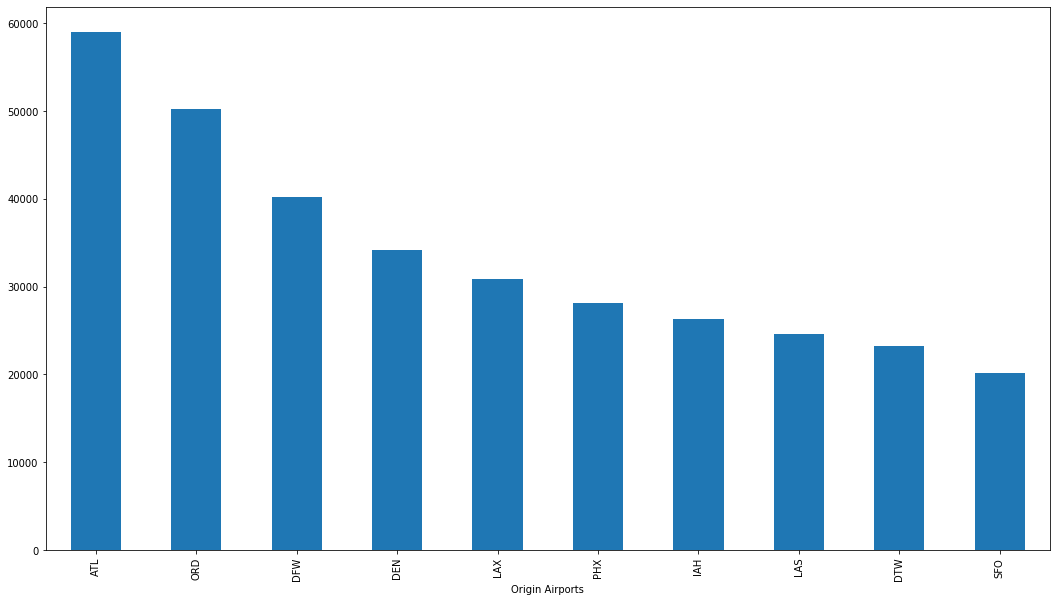

In [13]:
flights_2008_df['Origin'].value_counts().nlargest(n=10).plot(kind='bar', figsize=(18,10))
plt.xlabel('Origin Airports')
plt.show()

I see that ATL, ORD, and DFW are the top 3 Origin airports in my flight data

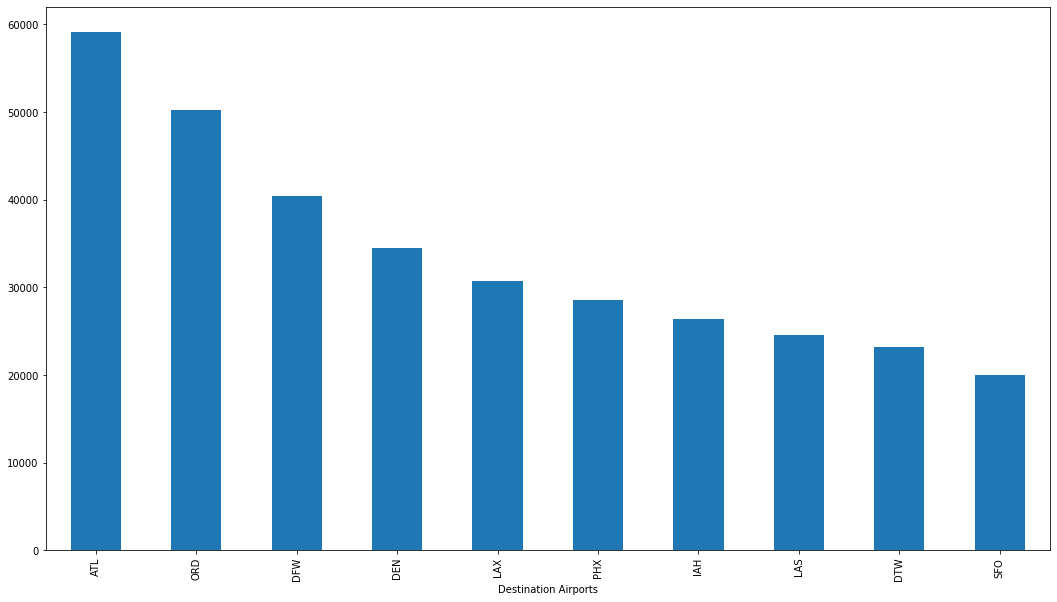

In [14]:
flights_2008_df['Dest'].value_counts().nlargest(n=10).plot(kind='bar', figsize=(18,10))
plt.xlabel('Destination Airports')
plt.show()

I see that ATL, ORD, and DFW are the top 3 Destination airports in my flight data

While only looking at the Origin/Dest variables separately, I can not assume anything yet. Let's look at the flights that have been cancelled or delayed

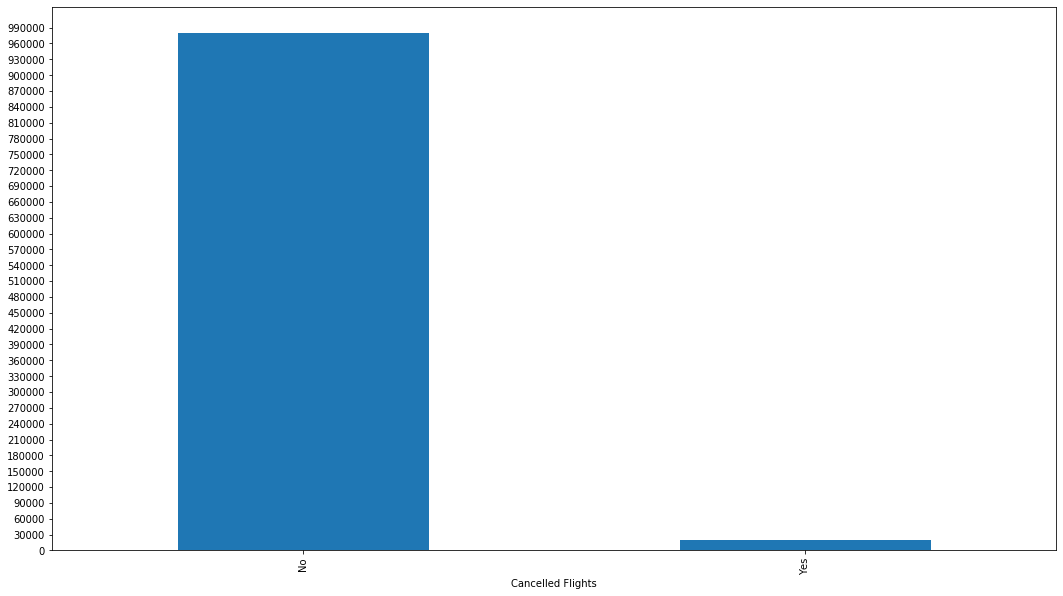

In [15]:
flights_2008_df['Cancelled'].value_counts().plot(kind='bar', figsize=(18,10))
plt.xlabel('Cancelled Flights')
plt.yticks(np.arange(0, 1000000, step=30000))
plt.show()

The majority of the flights do not experience cancellations, however it appears that a small percentage of flights do experience cancellations. In this sample, there are slightly less than 30k cancelled flights

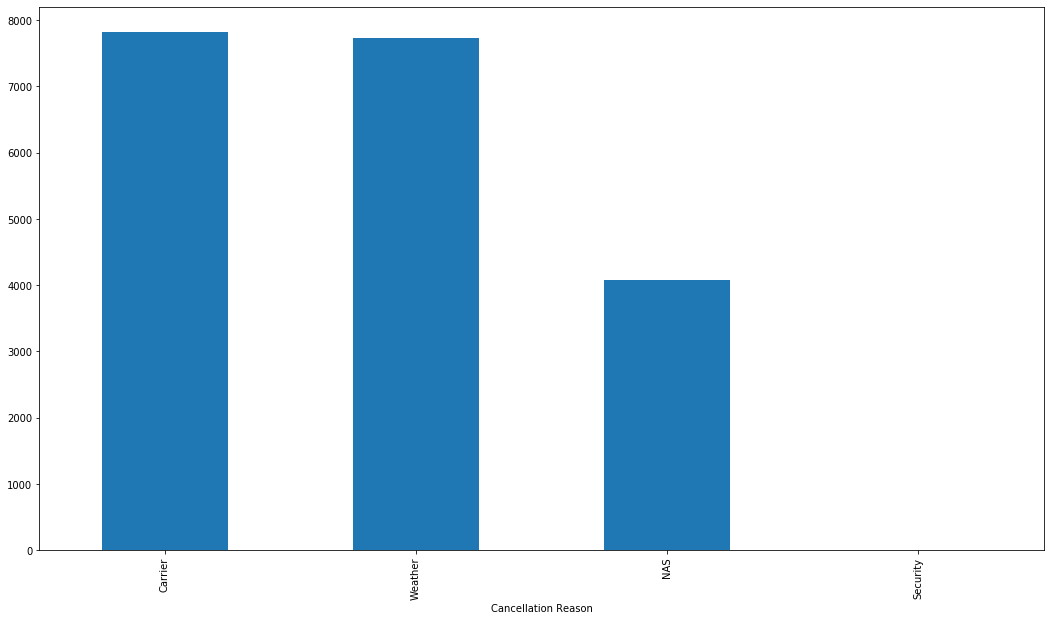

In [16]:
flights_2008_df['CancellationReason'].value_counts().plot(kind='bar', figsize=(18,10))
plt.xlabel('Cancellation Reason')
plt.show()

It seems that the top 2 reasons for a cancellation is: Carrier Delay and Weather Delays. It seems pretty rare to get a delay due to Security so I will ignore this type of delay in later steps since I do not have enough datapoints.

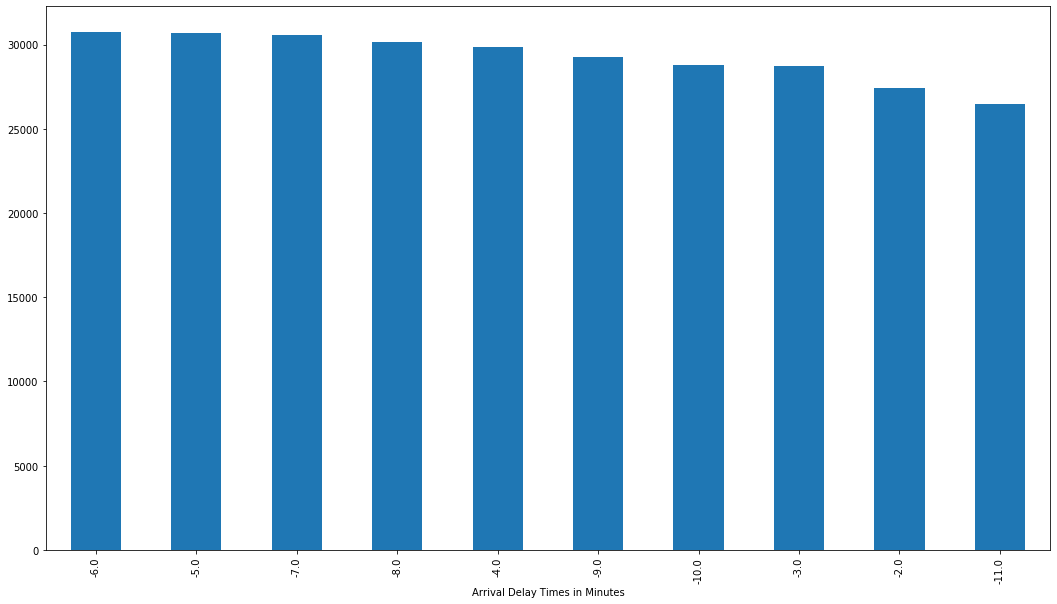

In [17]:
flights_2008_df['ArrDelay'].value_counts().nlargest(n=10).plot(kind='bar', figsize=(18,10))
plt.xlabel('Arrival Delay Times in Minutes')
plt.show()

When looking at the Arrival Delay, it looks like the top delay values I see are negative, which could indicate that the flights tend to arrive sooner than expected

/Users/lrodrig/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lrodrig/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


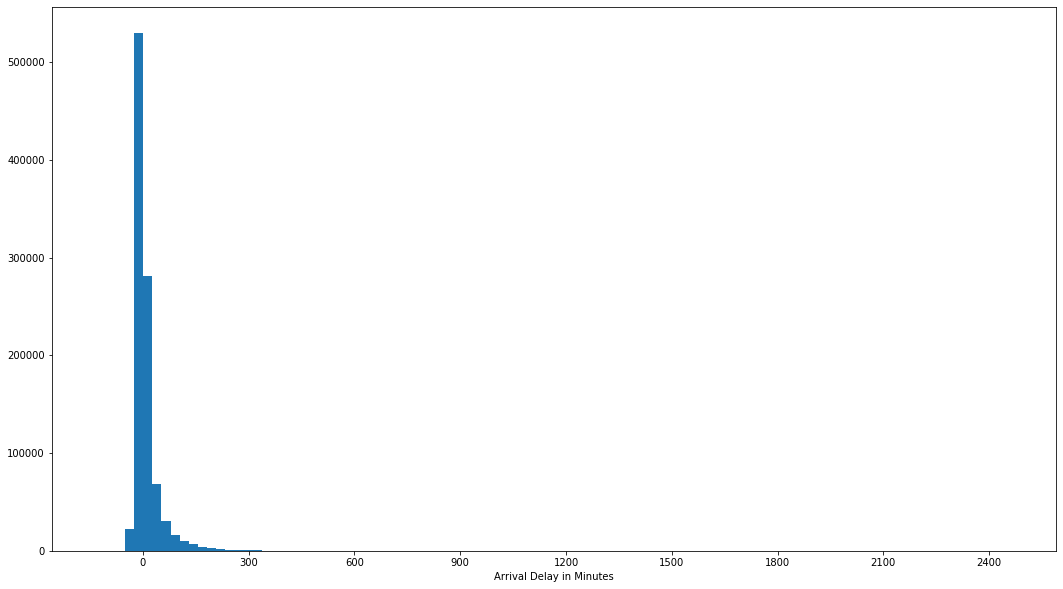

In [18]:
plt.figure(figsize=[18, 10])
plt.hist(data = flights_2008_df, x = 'ArrDelay', bins = 100)
plt.xlabel('Arrival Delay in Minutes')
plt.xticks(np.arange(0, 2500, step=300))
plt.show()

Looking at an overall distribution of the Arrival Delay above, I can see that the arrival delay centers close to 0, with about slightly more than half the flights experiencing positive minutes of delay versus the slightly less than half experiencing negative delays

Let's look at the same for Departure Delays

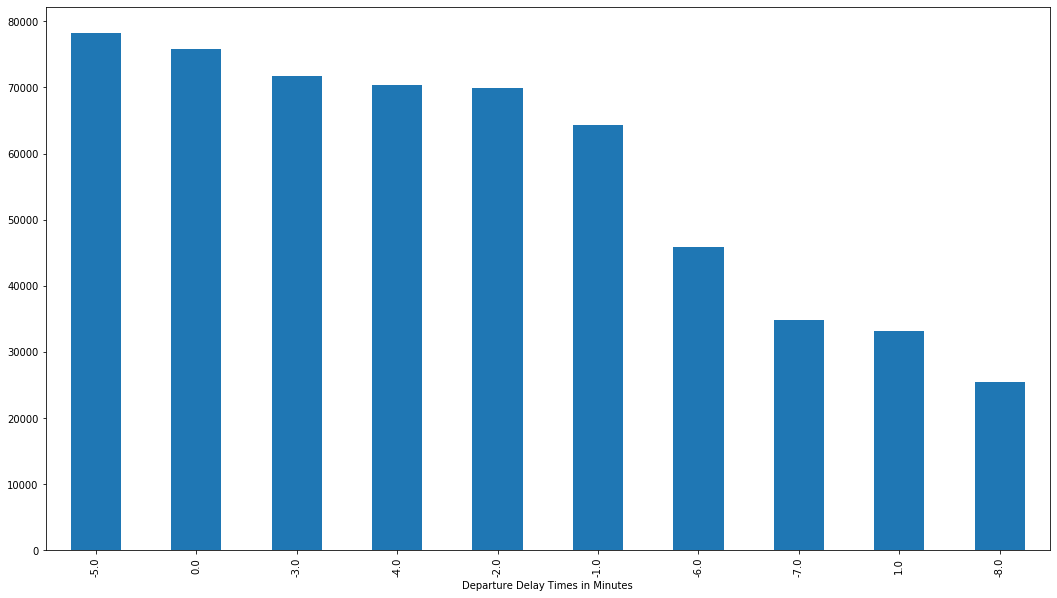

In [19]:
flights_2008_df['DepDelay'].value_counts().nlargest(n=10).plot(kind='bar', figsize=(18,10))
plt.xlabel('Departure Delay Times in Minutes')
plt.show()

Again, it looks like the top delays that we see show negative delays, altough I do see that 0 minutes delays is a top 2 option meaning the flights tend to depart a bit earlier that expected or typically right on time. 

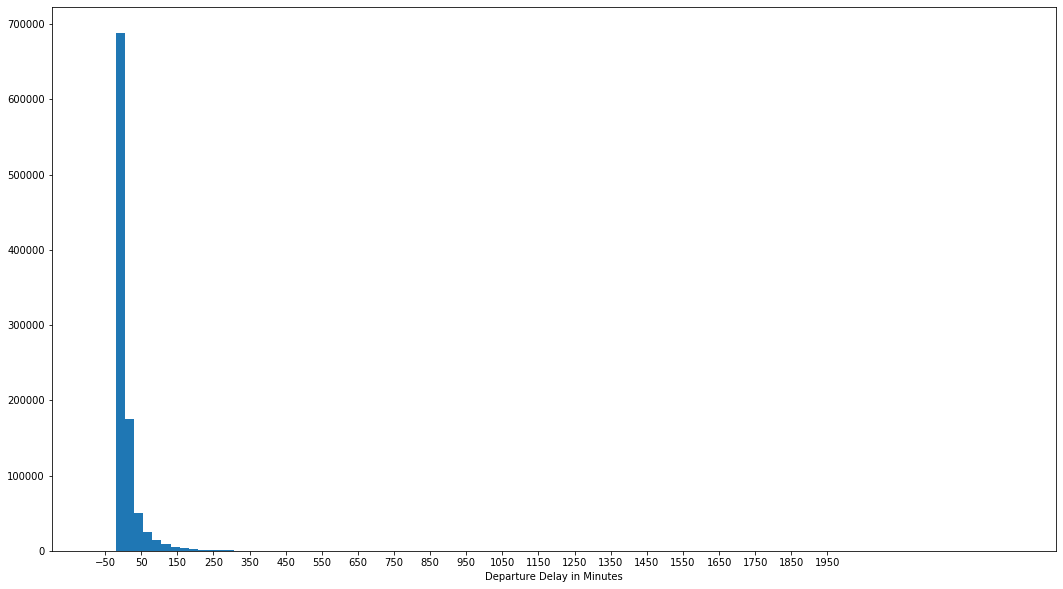

In [20]:
plt.figure(figsize=[18, 10])
plt.hist(data = flights_2008_df, x = 'DepDelay', bins = 100)
plt.xlabel('Departure Delay in Minutes')
plt.xticks(np.arange(-50, 2000, step=100))
plt.show()

Looking at an overall distribution of the Departure Delays above, I can see that that majority of the departures are less than 50 minutes. With a smaller amount of delays that stretch beyond 90 minutes which would be our major delays possibly worth looking at further

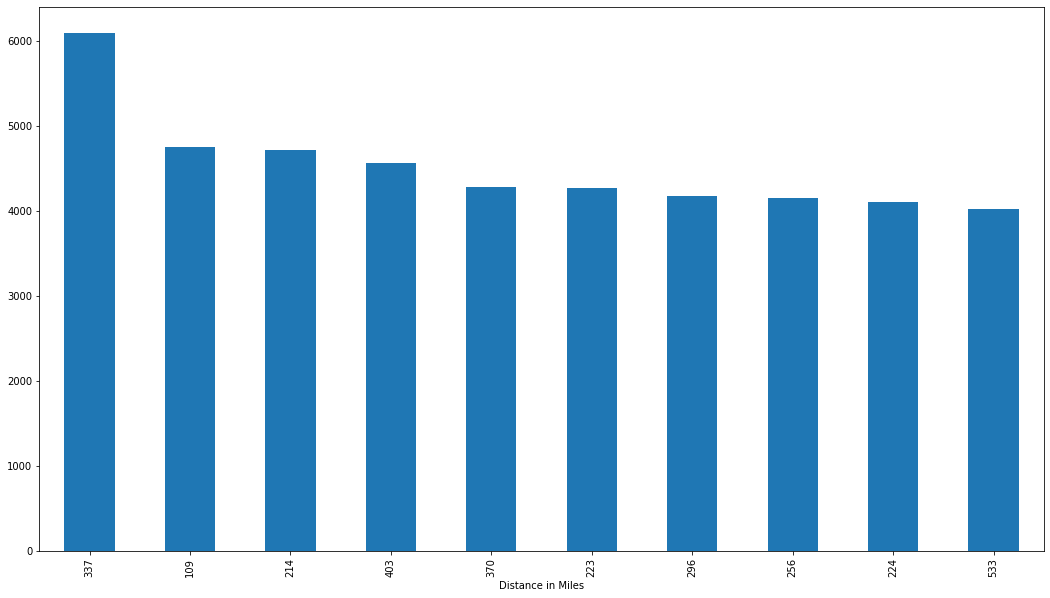

In [21]:
flights_2008_df['Distance'].value_counts().nlargest(n=10).plot(kind='bar', figsize=(18,10))
plt.xlabel('Distance in Miles')
plt.show()

Looking at the top longest distances for my flight data, it looks like the longest flights have distances of 337, 109, and 214 miles. Perhaps longer flights experience more or less delays on average?

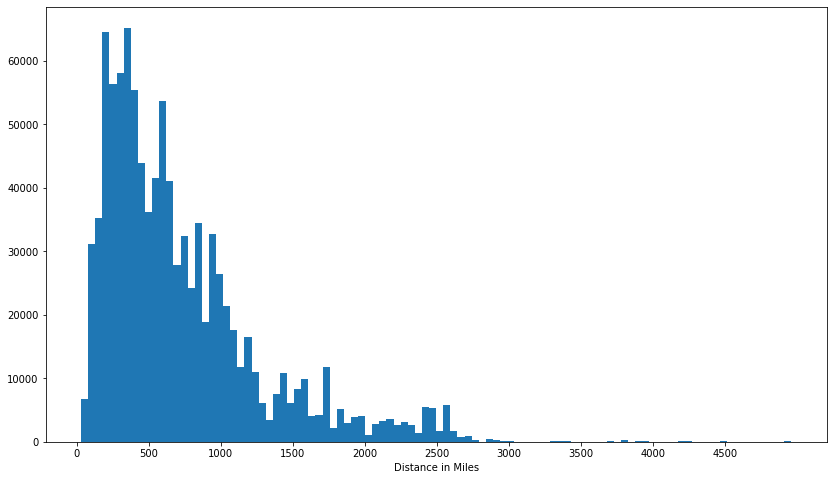

In [22]:
plt.figure(figsize=[14, 8])
plt.hist(data = flights_2008_df, x = 'Distance', bins = 100)
plt.xlabel('Distance in Miles')
plt.xticks(np.arange(0, 5000, step=500))
plt.show()

Above I am looking at an overall distribution of the distance data of my flights. It looks like most flights tend to be less than 1000 miles, although there are plenty of flights that are longer than 1000 miles.

For the next few visualizations, I want to look at each delay variable separately

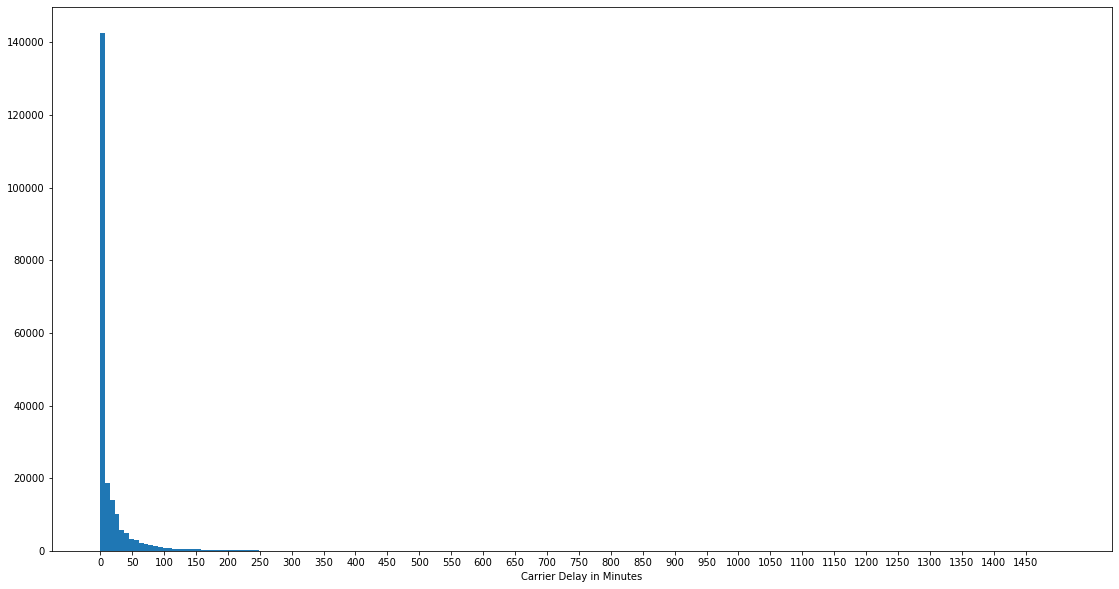

In [23]:
plt.figure(figsize=[19, 10])
plt.hist(data = flights_2008_df, x = 'CarrierDelay', bins = 200)
plt.xlabel('Carrier Delay in Minutes')
plt.xticks(np.arange(0, 1500, step=50))
plt.show()

For Carrier Delays, the majority of flights that have experienced these delays tend to last about less than 30 minutes, and some extreme delays occuring at over 200 minutes!

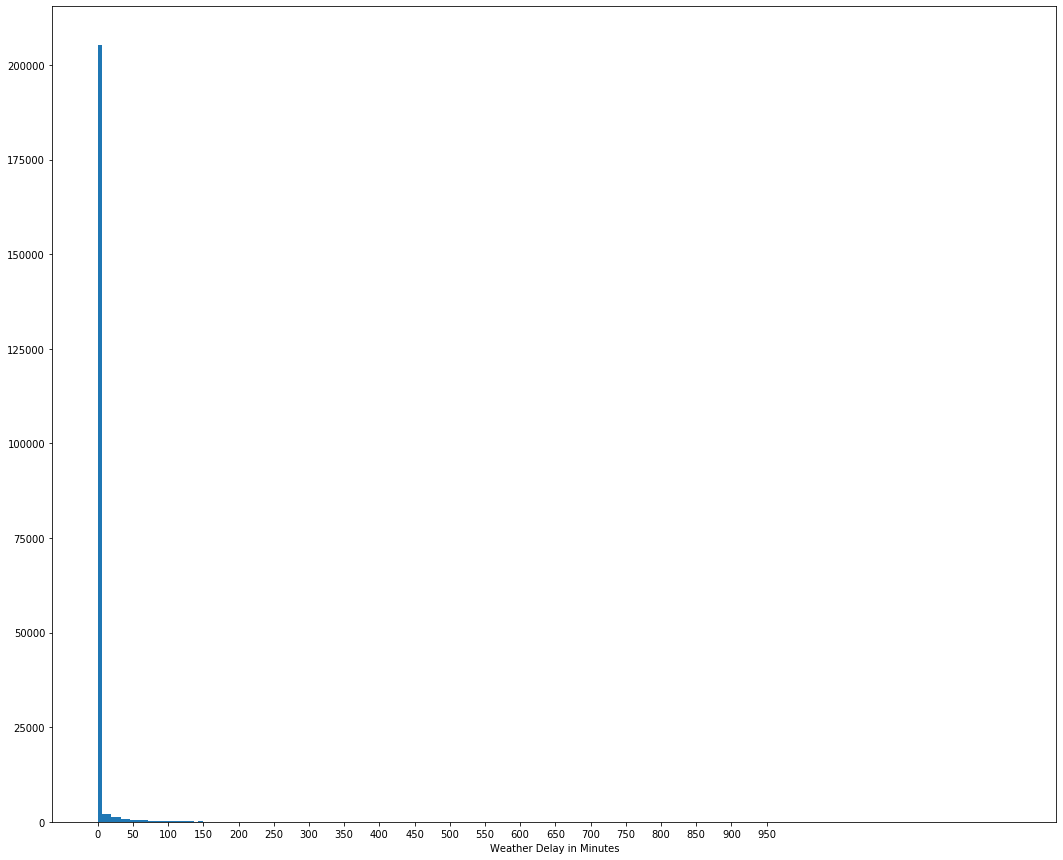

In [24]:
plt.figure(figsize=[18, 15])
plt.hist(data = flights_2008_df, x = 'WeatherDelay', bins = 200)
plt.xlabel('Weather Delay in Minutes')
plt.xticks(np.arange(0, 1000, step=50))
plt.show()

For Weather Delays, the majority of flights that have experienced delays tend to last less than 30 minutes, with some extreme delays occuring at over 100 minutes!

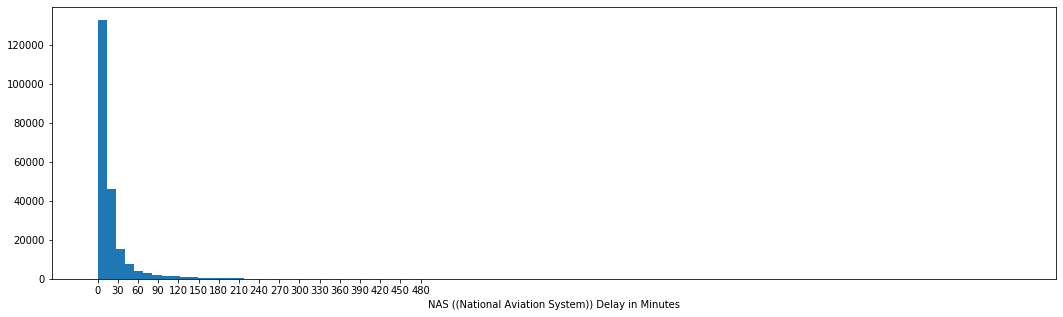

In [25]:
plt.figure(figsize=[18, 5])
plt.hist(data = flights_2008_df, x = 'NASDelay', bins = 100)
plt.xlabel('NAS ((National Aviation System)) Delay in Minutes')
plt.xticks(np.arange(0, 500, step=30))
plt.show()

For NAS (National Aviation System) delays, the majority of flights that experience this tend to be delayed for less than 30 minutes, while some occurances of extreme delays occuring at over 150 minutes!

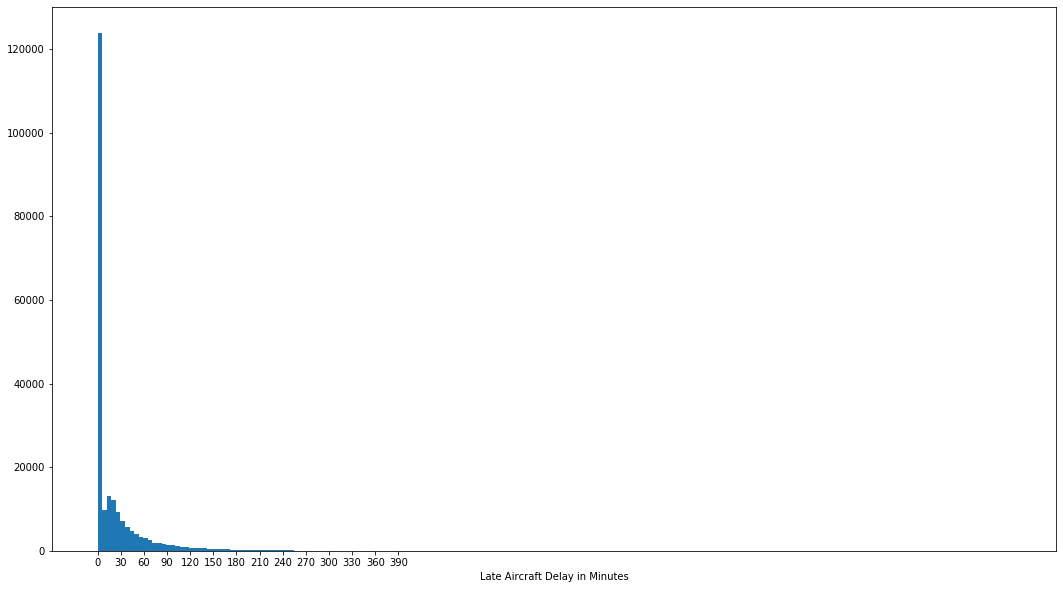

In [26]:
plt.figure(figsize=[18, 10])
plt.hist(data = flights_2008_df, x = 'LateAircraftDelay', bins = 200)
plt.xlabel('Late Aircraft Delay in Minutes')
plt.xticks(np.arange(0, 400, step=30))
plt.show()

For Late Aircraft Delays, the majority of flights that experience this tend to be delayed for less than 60 minutes, and most of them are really close to 0, although I see that for non-zero delays, some flight delays are around 30 minutes with more flights being more extreme with over 200 minutes!

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Overall the various delay data ranges from a few minutes under 0 (negative values) to most values being above zero (positive) since we are discussing delay. Skew is expected to be seen. The different delay distributions are rightly skewed due to airlines aiming for 0 minutes but experience positive minutes in delay.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

This dataset is fairly straightforward so there were not too many unusual distributions, aside from showing skewness. I performed a few operations on the dataset to be able to work with the data more efficiently when representing the datapoints in visualizations. Examples of this including transforming the CancellationCode column so that it instead showed me the actual reason that aligned with the code assigned. During the visualization, it was easier to understand each bar in the bar graphs.

## Bivariate Exploration

I will now explore some relationships between different variables of interest from my flight data. <br>
First I will look at the pairwise correlations present between different features in the flight data

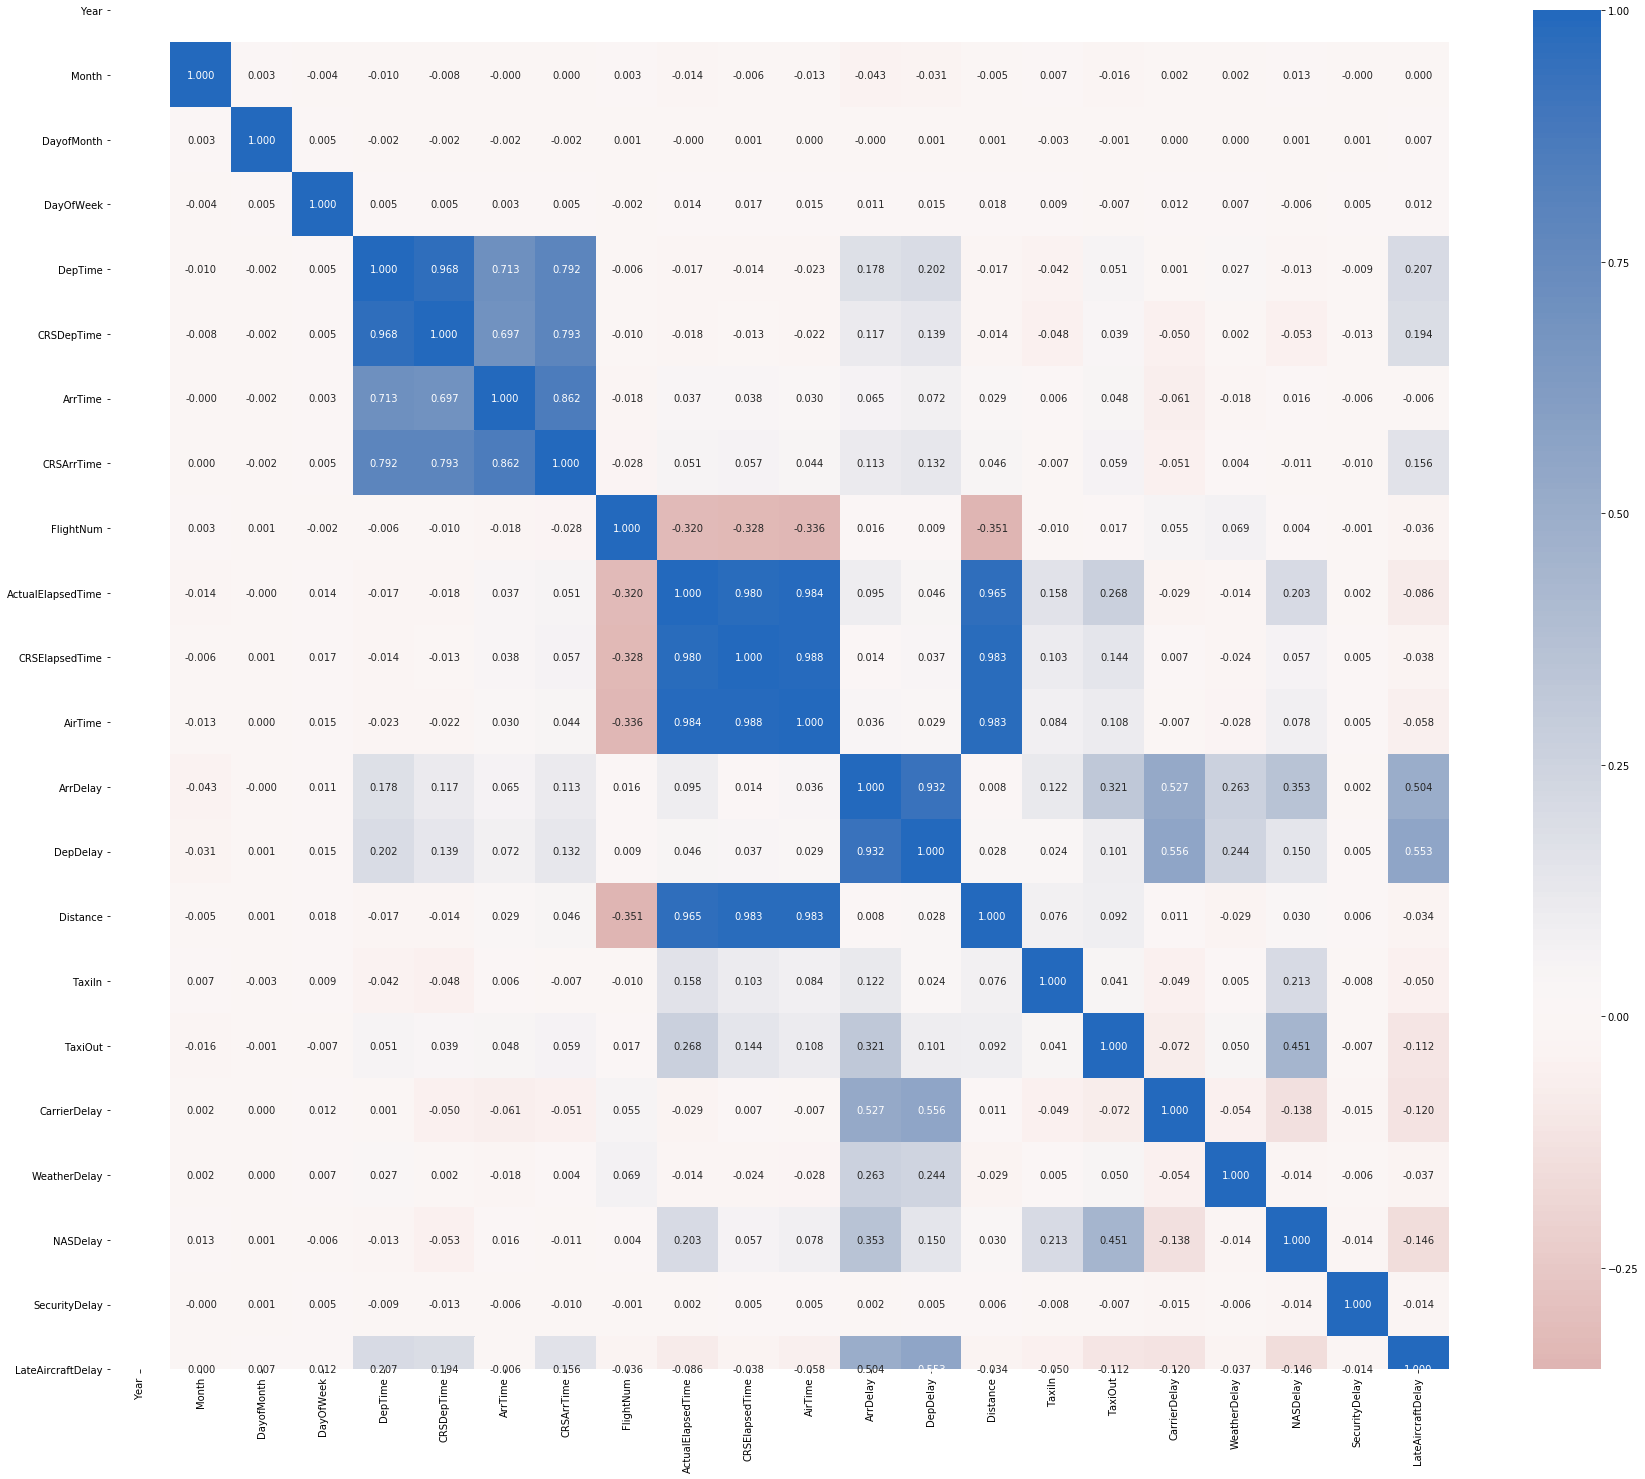

In [27]:
# correlation plot
plt.figure(figsize = [30, 25])
sb.heatmap(flights_2008_df.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

From looking at the different correlations, I can see that the CRSElapsedTime,Airtime,ActualElapsedTime are highly correlated with each other as well as with Distance. This is not too surprising since longer distances required for flights would mean that the flight would take more time. Also, as more Airtime is needed, this woul mean that omre time would elapse and affect the other features. The same would be applied with ArrTime and DepTime, where any changes in Arrival or Departure time would mean that overall Elapsed time would also change accordingly. <br>
There are a few other pairs where there is some correlation, however they are also related to Departure and Arrival times, as more than likely one impact in one area would affect the many different time features in this flight dataset. <br>
Let's now look at some of these pairs a bit closer.

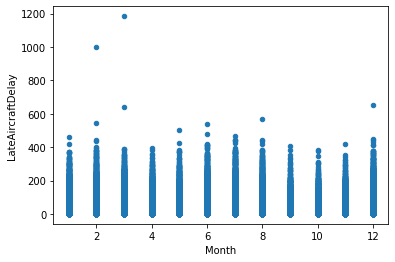

In [28]:
flights_2008_df.plot.scatter(y='LateAircraftDelay',x='Month');

Looking at LateAircraftDelay over the course of the year, there seems to be some wave type of pattern throughout the year. This could mean that throughout the months, different procedures or even factors such as weather could play a role here to overall Aircraft delay. Seeing that there is also a WeatherDelay feature, I will explore this relationship as well next.

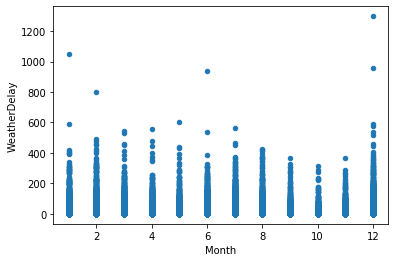

In [29]:
flights_2008_df.plot.scatter(y='WeatherDelay',x='Month');

For WeatherDelay throughout the year, I can see that there are some months where flights experience more delays, typically around the Winter season coming into Spring season as well. With Summer/Fall season showing less delays overall due to weather. <br>
Next I'll look at Carrier Delays

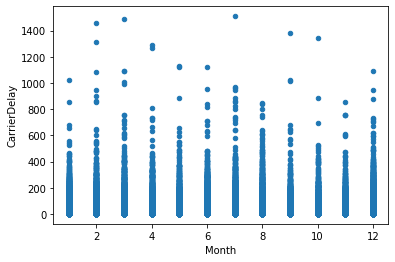

In [30]:
flights_2008_df.plot.scatter(y='CarrierDelay',x='Month');

CarrierDelays shows a similar trend to the previous comparisons where I notice more delays expected to happen in the Winter/Spring months, and a bit less during Summer/Fall. <br>
Let's look at how some of these time and delay features look against Distance

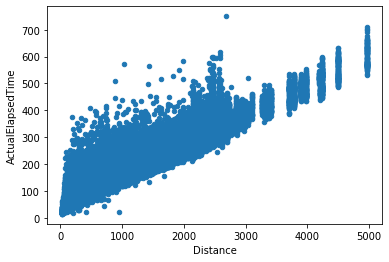

In [31]:
flights_2008_df.plot.scatter(y='ActualElapsedTime',x='Distance');

As seen above and unsurprisingly, I see a strong linear correlation between ActualElapsedTime and Distance. It is expected that flights with longer distances will take more time overall. From a quick view at the visualization, it looks like roughly every 1000 miles will add at least 100 more minutes to the ActualElapsedTime. <br>
Let's next compare LateAircraftDelay with Distance

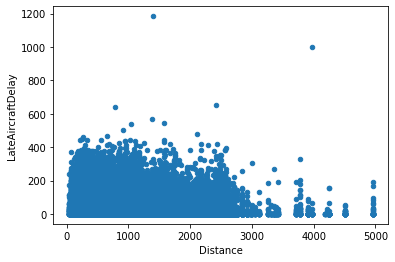

In [32]:
flights_2008_df.plot.scatter(y='LateAircraftDelay',x='Distance');

For this visualization, I see that there is a slight negative correlation with large distances tending to experience less Aircraft Delay. This could also be because long distance flights are able to make up for any initial time loss by flying a bit faster and thus being less susceptible to some delays. Overall, most flights within 3000 miles of distance can experience up to 400 minutes of delay, while above 3000 miles of distance flights may experience less than 200 minutes of delay over the course of a year.

Next I will look at how some of my numeric features correlate with some of my categorical features. First I will look at the ActualElapsedTime  against Origin airport to see if there is strong correlation between some of these airports and time taken for flights. <br>
It could potentially show me that some flights originating from certain airports tend to experience more overall time. <br> 
I will only look at the top 10 Origin airports as shown in my previous visualization.

<Figure size 2520x2520 with 0 Axes>

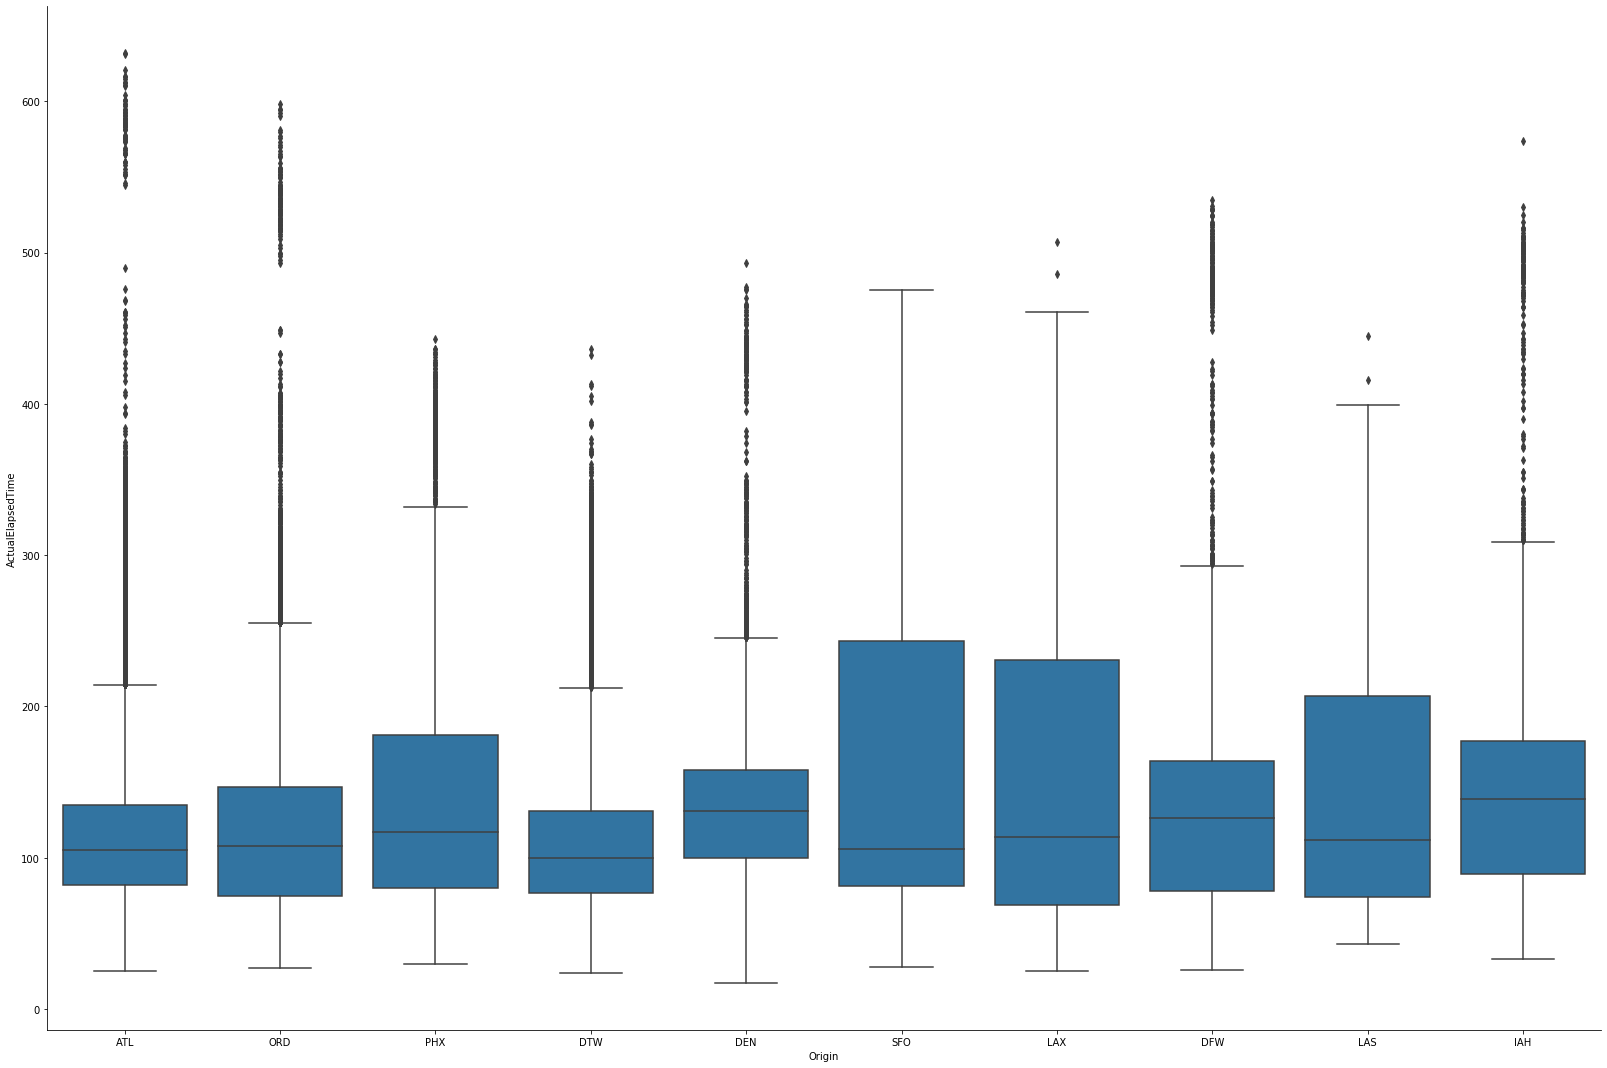

In [33]:
# plot matrix of numeric features against categorical feature
flights_2008_filtered_origin = flights_2008_df.query('Origin == "ATL" or Origin == "ORD" or Origin == "DFW" or Origin == "DEN" or Origin == "LAX" or Origin == "PHX" or Origin == "IAH" or Origin == "LAS" or Origin == "DTW" or Origin == "SFO"')

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [35, 35])
g = sb.PairGrid(data = flights_2008_filtered_origin, y_vars = ['ActualElapsedTime'], x_vars = ['Origin'],
                height = 15, aspect = 1.5)
g.map(boxgrid)
plt.show();

Looking at the boxplot above, I can see that for the top 10 Origin airports, most overall Elapsed times tend to be around 85-130 minutes. 9 out of the 10 top airports have outliers where their elapsed times where much higher than the other flights from that airport. This could potentially be due to those airports having more International Flights that the rest of the other airports. However, SFO is the only airport that does not show me any outliers in this data, and it is also an international airport. This is something that perhaps with more data I can dig deeper.

I will now do the same but will use the Top 10 Destination Airports as highlighted in a previous visualization.

<Figure size 6120x6120 with 0 Axes>

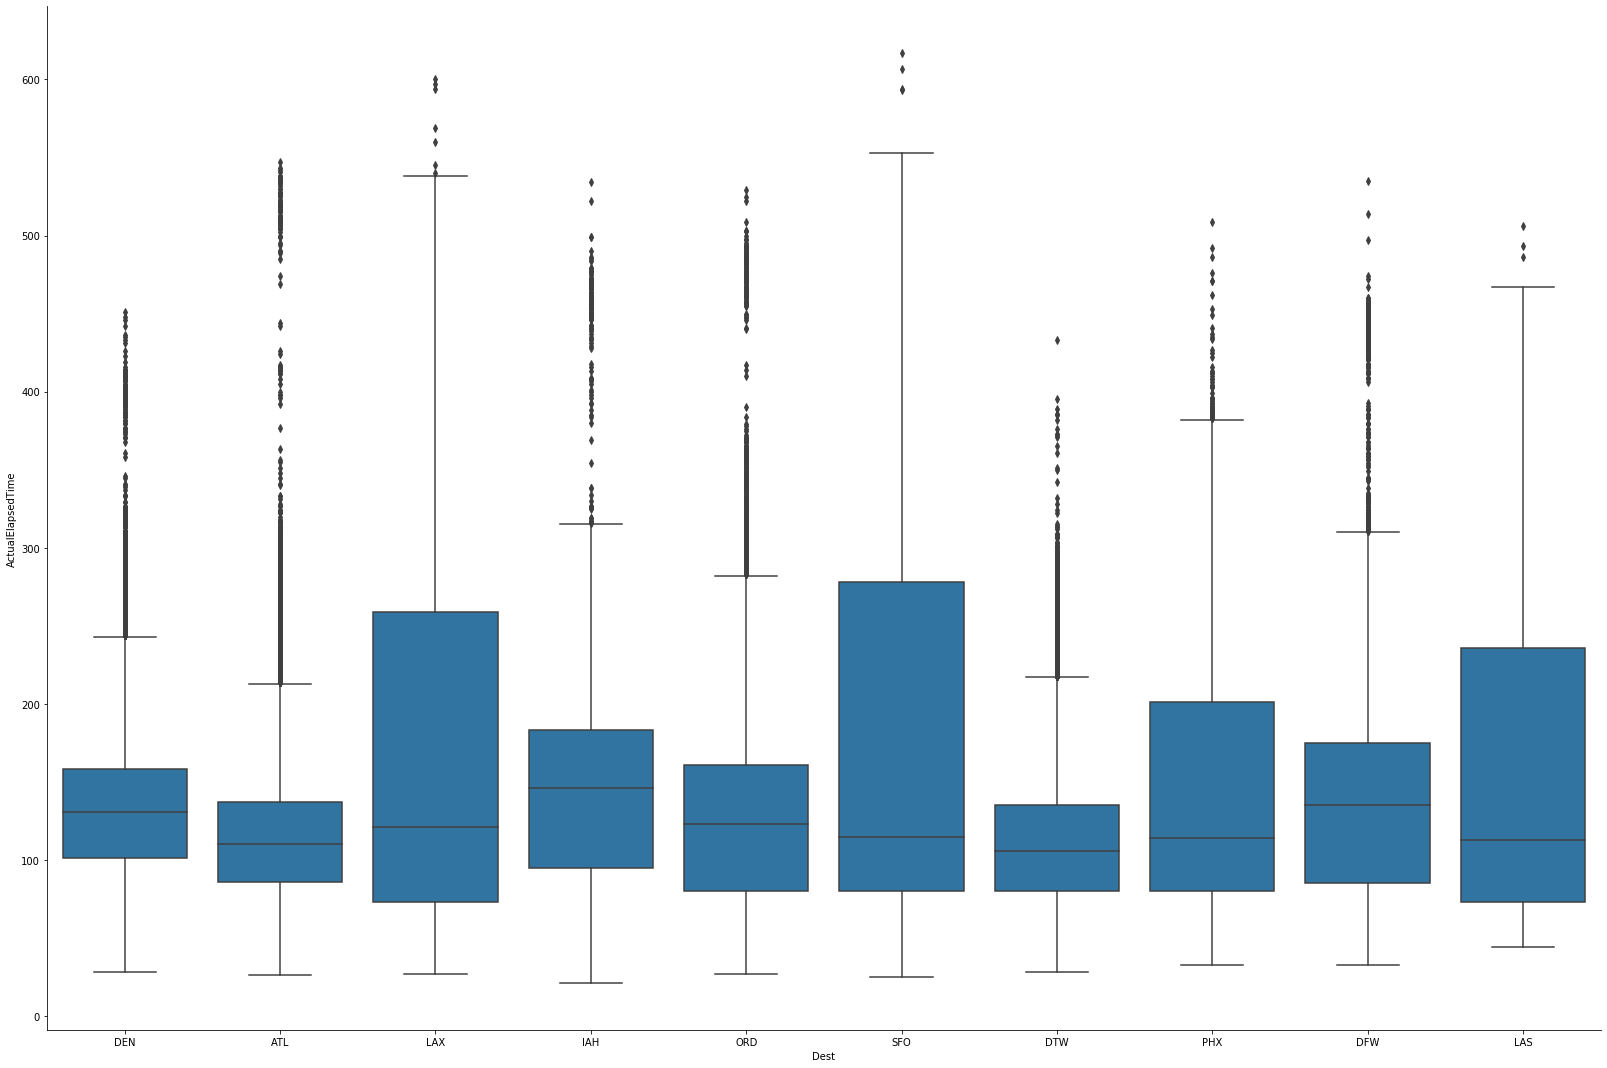

In [34]:
# plot matrix of numeric features against categorical feature
flights_2008_filtered_dest = flights_2008_df.query('Dest == "ATL" or Dest == "ORD" or Dest == "DFW" or Dest == "DEN" or Dest == "LAX" or Dest == "PHX" or Dest == "IAH" or Dest == "LAS" or Dest == "DTW" or Dest == "SFO"')
#print(flights_2008_filtered.head())

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [85, 85])
g = sb.PairGrid(data = flights_2008_filtered_dest, y_vars = ['ActualElapsedTime'], x_vars = ['Dest'],
                height = 15, aspect = 1.5)
g.map(boxgrid)
plt.show();

Looking at the boxplot above, I see that for the top 10 Destination airports, most overall Elapsed times are around 100-170 minutes. This is slightly higher that the elapsed time against the Origin airports, although all airports have some outliers, overall it looks like there is less outliers across the Destination airports. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

For this part of the investigation, I did a bivariate exploration. I first looked at the pairwise correlations to give me an initial idea of how the features of interest varied with other features in the dataset. As expected the delays and features related to time showed various strong correlations that were worth exploring a bit more. Features such as ActualElapsedTime showed me how certain flights had more or less time elapsed and I could see how some of the overall delay features were affected due to Carrier delays or Weather delays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

When looking at the flights across months as well as comparing the overall time against distance, I did not really find many surprises as I expected time to be strongly correlated with distance. I did somewhat hope that month would show a lot more delays during winter seasons and although there may be some relationship, this is not something I would explore further. I did see how the airports that had the most flights in this dataset tend to have a higher chance of experiencing high amounts of delays with many outliers going way beyond the time that any person would probably want to be around for a flight.

## Multivariate Exploration

For this section, I want to explore the relationship of the ActualElapsedTime of flights against my categorical values of Airports, Top 10 Origin and Top 10 Destination. I will create a quick function to be able to provide the same heatmaps against my variables in different visualizations

In [35]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)

/Users/lrodrig/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


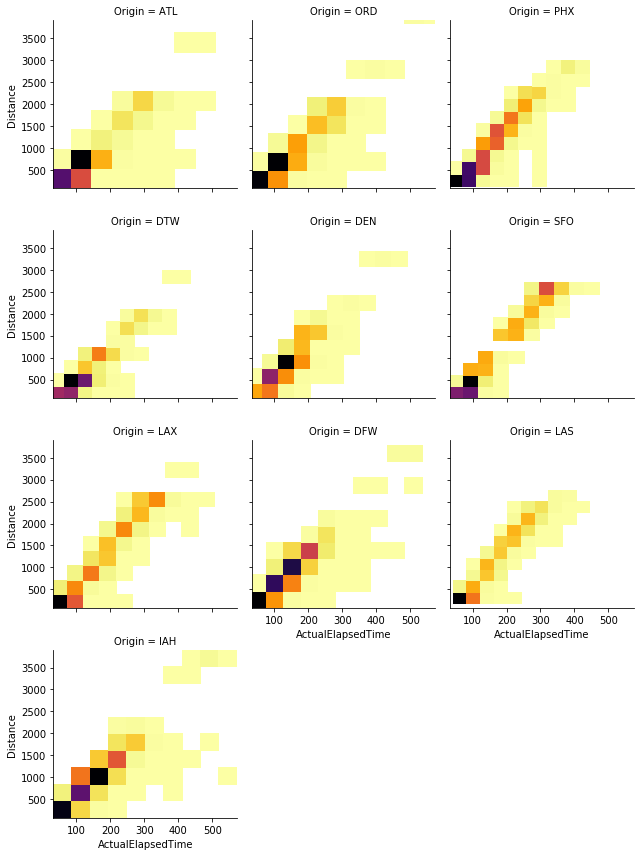

In [36]:
g = sb.FacetGrid(data = flights_2008_filtered_origin, col = 'Origin', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'ActualElapsedTime','Distance', color = 'inferno_r')

plt.show()

Looking at the faceted heatmap above, I can see the relationship of the Origin Airport locations against the Distance and ActualElapsedTime. Depending on the airport origin, I can see that the cloud of points will tend to have higher or lower amount of time that will have elapsed across different distances. Origin airports such as Las Vegas tend to have small elapsed times and very light amount of long distance fights that required a big amount of time. Airports such as IAH (Houston) tends to have majority of the data points across small and medium distance flights, with small and medium elapsed amount of time. Airports such as ATL have highly condensed amount of points for shorter flights that have taken a minimal amount of time. 

I will now look at a similar faceted heatmap, but against the top 10 Destination Airports in my flight data.

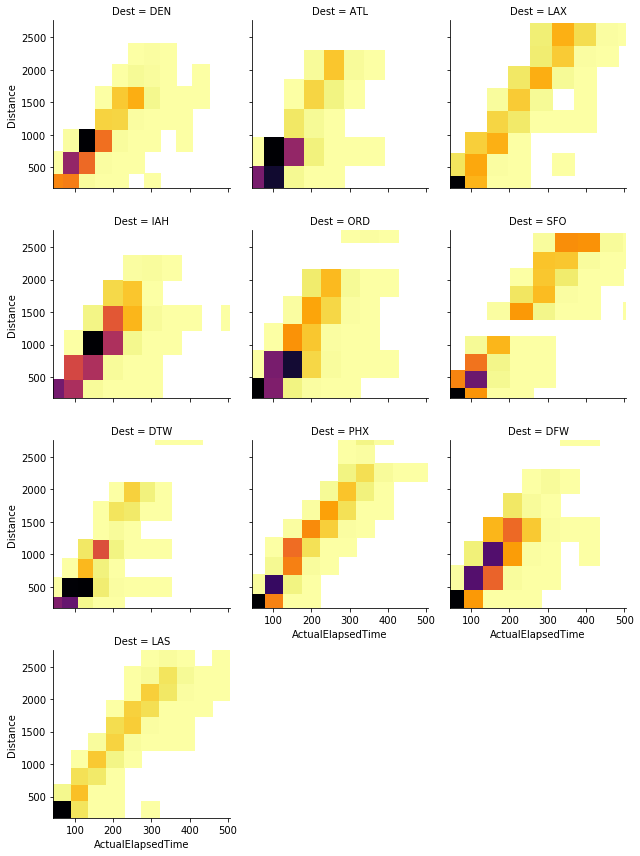

In [37]:
g = sb.FacetGrid(data = flights_2008_filtered_dest, col = 'Dest', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'ActualElapsedTime','Distance', color = 'inferno_r')

plt.show()

As seen above, I analyze that the relationship of the Destination Airport locations against the Distance and ActualElapsedTime. Depending on the airport destination, I can see that the cloud of points will tend to have higher or lower amount of time that will have elapsed across different distances. Destination airports such as LAX and LAS tend to have small elapsed times and very light amount of long distance fights that required a big amount of time. Airports such as IAH (Houston) and DFW (Dalllas) tend to have majority of the data points across small and medium distance flights, with small and medium elapsed amount of time. 

Next I will look at how CancellationReasons compare against the flights when looking at the distance that was expected for each flight and the month of the year.

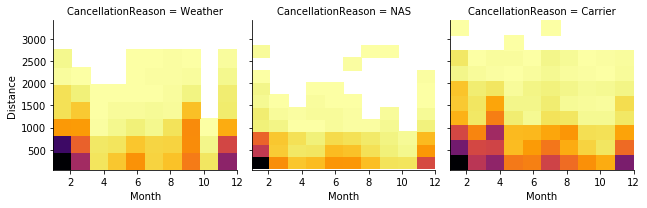

In [38]:
flights_2008_filtered_cancellationreason = flights_2008_filtered_origin.query('CancellationReason == "Carrier" or CancellationReason == "Weather" or CancellationReason == "NAS"')
#print(flights_2008_filtered_cancellationreason.head())

g = sb.FacetGrid(data = flights_2008_filtered_cancellationreason, col = 'CancellationReason', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'Month','Distance', color = 'inferno_r')

plt.show()

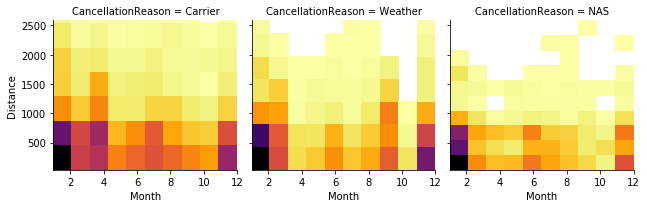

In [39]:
flights_2008_filtered_cancellationreason = flights_2008_filtered_dest.query('CancellationReason == "Carrier" or CancellationReason == "Weather" or CancellationReason == "NAS"')
#print(flights_2008_filtered_cancellationreason.head())

g = sb.FacetGrid(data = flights_2008_filtered_cancellationreason, col = 'CancellationReason', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'Month','Distance', color = 'inferno_r')

plt.show()

For both heatmaps above for Origin and Destination airport, I can see that cancellations happened more towards the winter months. One thing that does stand out is that the cancellations due to the Carrier is more evenly spread out throughout the year, meaning that cancellations by the carrier can happen any time during the year, while weather cancellations are more likely to affect flights during harsh winter seasons.

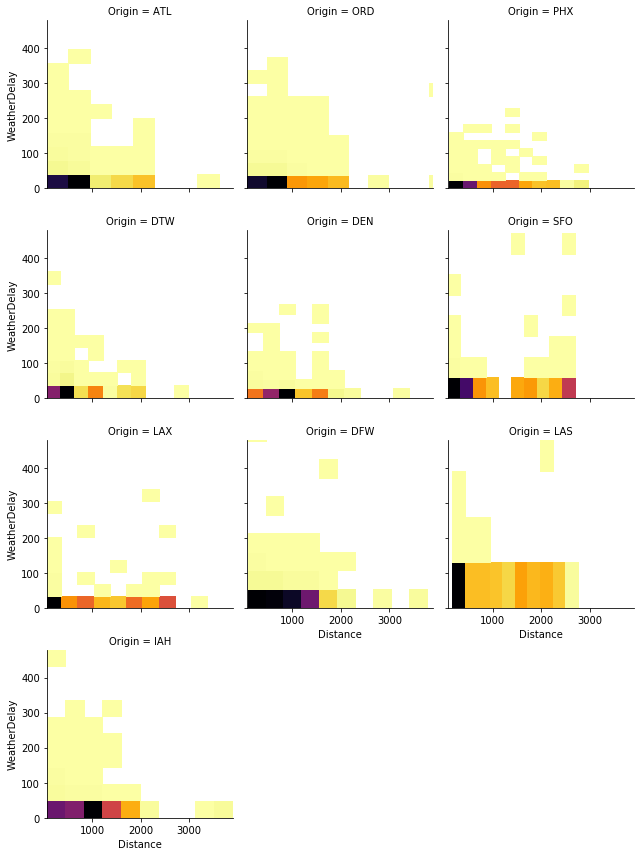

In [40]:
g = sb.FacetGrid(data = flights_2008_filtered_origin, col = 'Origin', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'Distance','WeatherDelay', color = 'inferno_r')

plt.show()

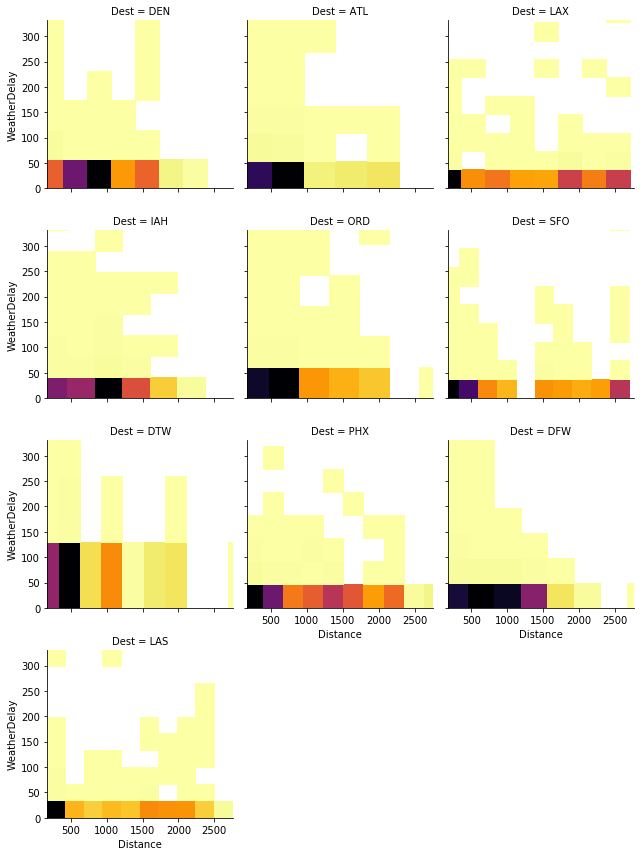

In [41]:
g = sb.FacetGrid(data = flights_2008_filtered_dest, col = 'Dest', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'Distance','WeatherDelay', color = 'inferno_r')

plt.show()

When looking further into Weather and comparing it to WeatherDelay minutes, I can see that from the top 10 airports, LAS airport tends to experience more delays typically when it is an Origin, while Denver may typically see Weather Delays when it is the Destination airport

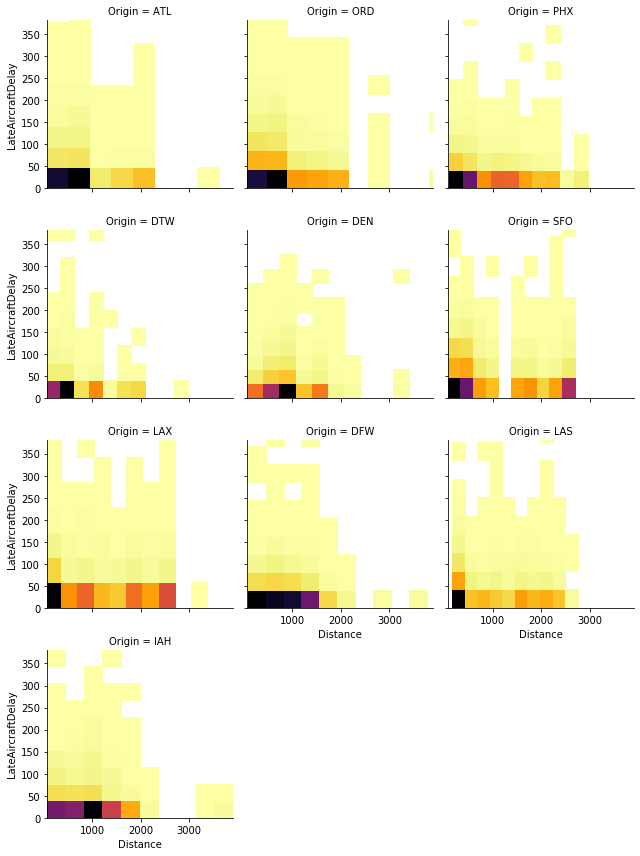

In [42]:
g = sb.FacetGrid(data = flights_2008_filtered_origin, col = 'Origin', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'Distance','LateAircraftDelay', color = 'inferno_r')

plt.show()

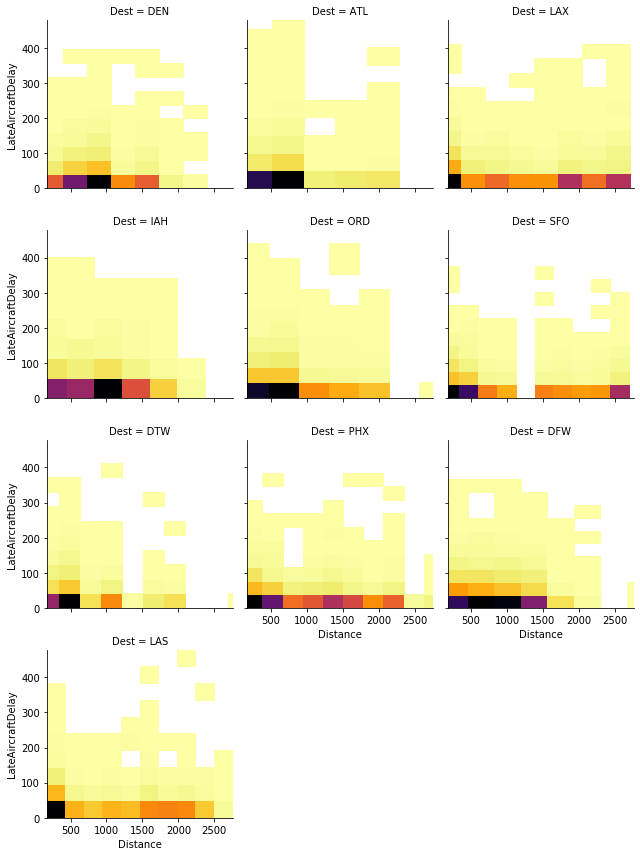

In [43]:
g = sb.FacetGrid(data = flights_2008_filtered_dest, col = 'Dest', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'Distance','LateAircraftDelay', color = 'inferno_r')

plt.show()

As seen above, I notice that aircrafts tend to have more likelihood of being delayed for shorter flights rather than long flight, regardless of which aircraft they are flying from or frlying to. However, some airports such as IAH, PHX, and LAX experience LateAircraft delays for all kinds of flights, short and long distance.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of flights and how they may experience delays depending on other features such as Origin/Destination airports and distance the flights had to travel and overall elapsed time of the flights. The multivariate exploration in this section showed that there is certainly some effect of the location from which the flight is flying from or flying to. This could mean that either depending on the quanty that each airport recieves or weather conditions that each location recieves, delays have a good chance to occur. I see that while distance has a linear relationship to overall elapsed time, the amount of delays experienced are focused more along the shorter distance flights.

### Were there any interesting or surprising interactions between features?

Looking at the different plots, I see that is interesting how some flights that were cancelled may have reasons for Weather or the Carrier, but the Carrier cancellations are happening through the year, but have no relation to weather or other possible options, so this would be interesting to explore why exactly some flights get cancelled if it is not due to weather.